# Bank Marketing Campaign Data Understanding
Bank Campaign Marketing
Dataset information
- Four Datasets
    - bank-additional-full.csv
        - all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
        - 41118 rows, 21 columns
    - bank-additional.csv
        - 10% of first dataset, randomly selected
        - 4119 rows × 21 columns
    - bank-full.csv
        - All examples and 17 inputs, ordered by date
        - 45211 rows × 17 columns
    - bank-full.csv
        - 10% of the examples
        - 17 inputs
        - Randomly selected from third dataset
        - 4521 rows × 17 columns
    - Notes
        - Smaller datasets are used for resource intensive tasks (ex. SVM)
Variables
1. Bank client data:
    1. age (
        1. numeric)
    2. job :
        1.  type of job 
        2. (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3. marital : 
        1. marital status 
        2. (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4. education 
        1. (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5. default: 
        1. has credit in default? 
        2. (categorical: 'no','yes','unknown')
    6. housing: 
        1. has housing loan? 
        2. (categorical: 'no','yes','unknown')
    7. loan: 
        1. has personal loan? 
        2. (categorical: 'no','yes','unknown')
2. Related with the last contact of the current campaign:
    1. contact: 
        1. contact communication type 
        2. (categorical: 'cellular','telephone') 
    2. month: 
        1. last contact month of year 
        2. (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    3. day_of_week: 
        1. last contact day of the week 
        2. (categorical: 'mon','tue','wed','thu','fri')
    4. duration: 
        1. last contact duration, in seconds (numeric). 
        2. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
3. Other attributes:
    1. campaign: 
        1. number of contacts performed during this campaign and for this client 
        2. (numeric, includes last contact)
    2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    3. previous: number of contacts performed before this campaign and for this client (numeric)
    4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
4. Social and Economic Context Attributes
    1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    2. cons.price.idx: consumer price index - monthly indicator (numeric) 
    3. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    4. euribor3m: euribor 3 month rate - daily indicator (numeric)
    5. nr.employed: number of employees - quarterly indicator (numeric)
5. What WE need
    1. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#created own CSV as previos
bankaddfull = pd.read_csv('bank-additional-full2.csv')
bankadd = pd.read_csv('bank-additional2.csv')
bankfull = pd.read_csv('bank-full2.csv')
bank = pd.read_csv('bank2.csv')

# Bank Additional Full Dataframe

In [3]:
bankaddfull

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [4]:
bankaddfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bankaddfull.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [6]:
bankaddfull.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

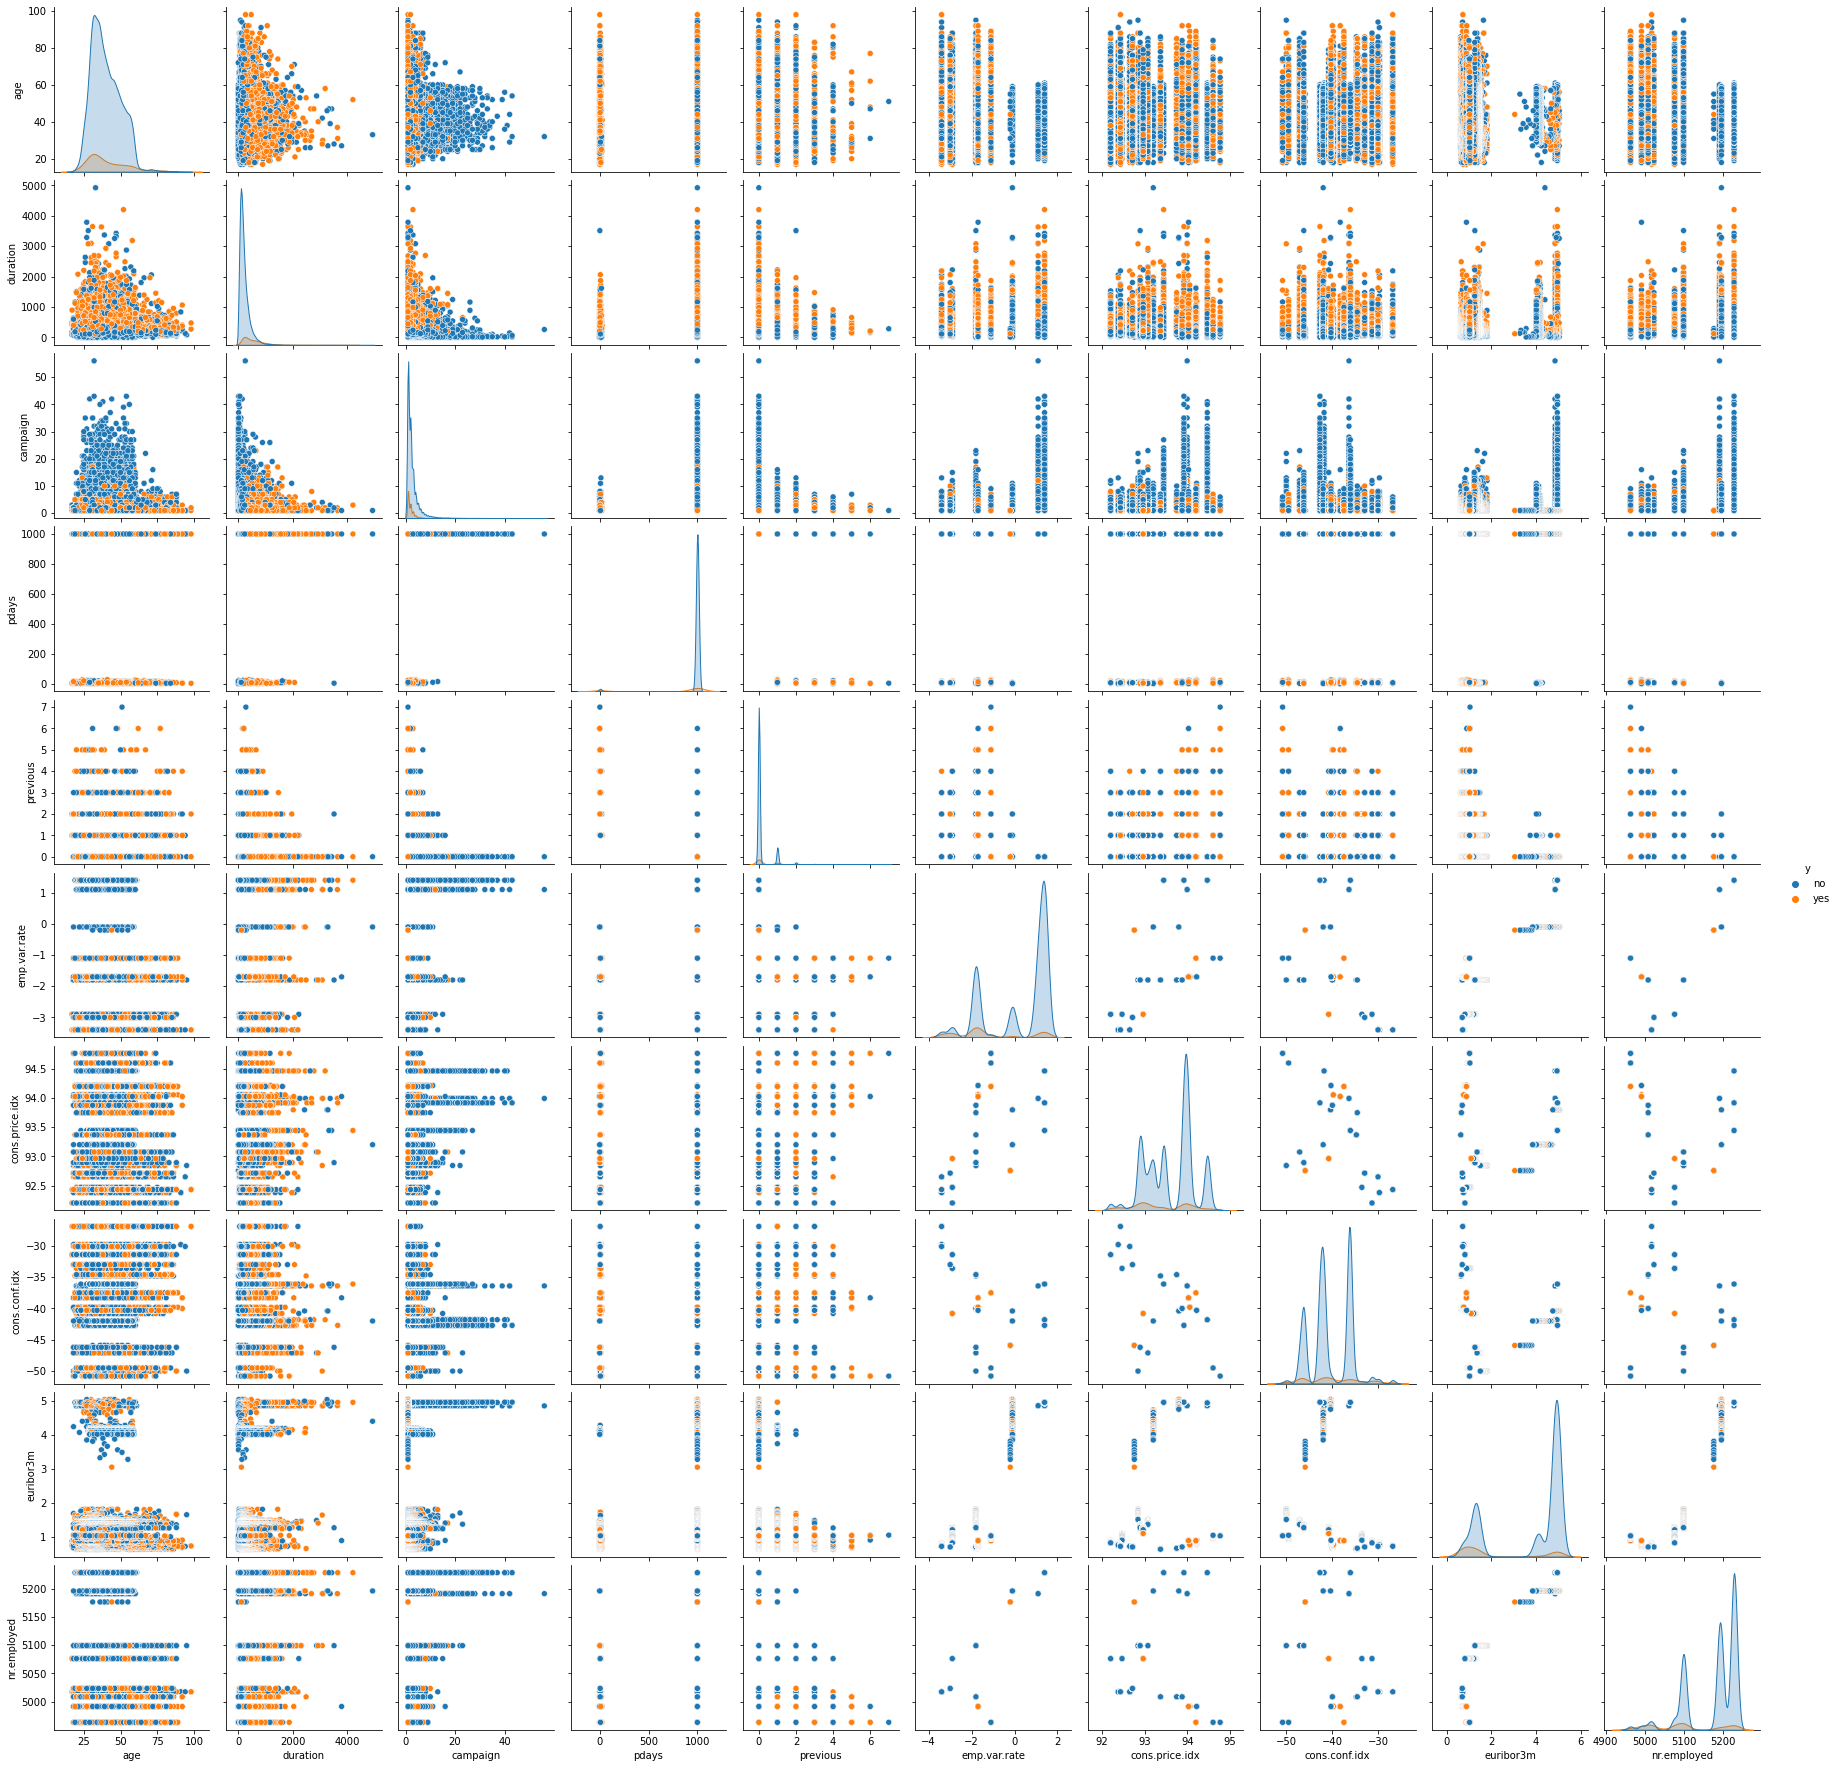

In [7]:
sns.pairplot(bankaddfull, hue='y')

<AxesSubplot:>

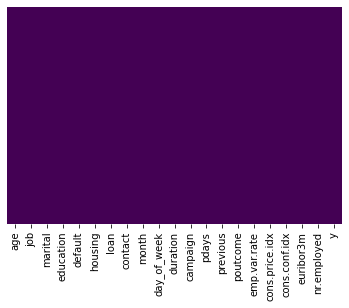

In [8]:
sns.heatmap(bankaddfull.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='marital', ylabel='count'>

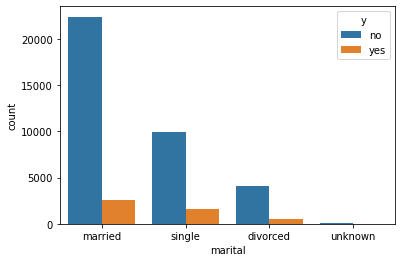

In [9]:
sns.countplot(data=bankaddfull, x='marital', hue='y')

In [10]:
bankaddfull.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.271004        0.078889      -0.091342   0.296899   
previous           -0.420489       -0.203130      -0.050936  -0.454494   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372605  
previous          -0.501333  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

In [11]:
yesaddfull = bankaddfull[bankaddfull['y']=='yes']
noaddfull = bankaddfull[bankaddfull['y']=='no']

In [12]:
len(yesaddfull['marital']=='married')

4640

In [13]:
noaddfull

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41180   36       admin.  married    university.degree       no      no   no   
41182   29   unemployed   single             basic.4y       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41180   cellular   nov         fri  ...         2    999         0   
41182   cellular   nov         fri  ...         1      9         1   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41180  nonexistent         -1.1          94.767          -50.8      1.028   
41182      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed   y  
0           5191.0  no  
1           5191.0  no  
2           5191.0  no  
3           5191.0  no  
4           5191.0  no  
...            ...  ..  
41180       4963.6  no  
41182       4963.6  no  
41184       4963.6  no  
41185       4963.6  no  
41187       4963.6  no  

[36548 rows x 21 columns]

# Bank Additional Dataframe

In [14]:
bankadd

age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

        contact month day_of_week  ...  campaign  pdays  previous  \
0      cellular   may         fri  ...         2    999         0   
1     telephone   may         fri  ...         4    999         0   
2     telephone   jun         wed  ...         1    999         0   
3     telephone   jun         fri  ...         3    999         0   
4      cellular   nov         mon  ...         1    999         0   
...         ...   ...         ...  ...       ...    ...       ...   
4114   cellular   jul         thu  ...         1    999         0   
4115  telephone   jul         fri  ...         1    999         0   
4116   cellular   may         mon  ...         2    999         1   
4117   cellular   aug         fri  ...         1    999         0   
4118   cellular   nov         wed  ...         1    999         0   

         poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent         -1.8          92.893          -46.2      1.313   
1     nonexistent          1.1          93.994          -36.4      4.855   
2     nonexistent          1.4          94.465          -41.8      4.962   
3     nonexistent          1.4          94.465          -41.8      4.959   
4     nonexistent         -0.1          93.200          -42.0      4.191   
...           ...          ...             ...            ...        ...   
4114  nonexistent          1.4          93.918          -42.7      4.958   
4115  nonexistent          1.4          93.918          -42.7      4.959   
4116      failure         -1.8          92.893          -46.2      1.354   
4117  nonexistent          1.4          93.444          -36.1      4.966   
4118  nonexistent         -0.1          93.200          -42.0      4.120   

      nr.employed   y  
0          5099.1  no  
1          5191.0  no  
2          5228.1  no  
3          5228.1  no  
4          5195.8  no  
...           ...  ..  
4114       5228.1  no  
4115       5228.1  no  
4116       5099.1  no  
4117       5228.1  no  
4118       5195.8  no  

[4119 rows x 21 columns]

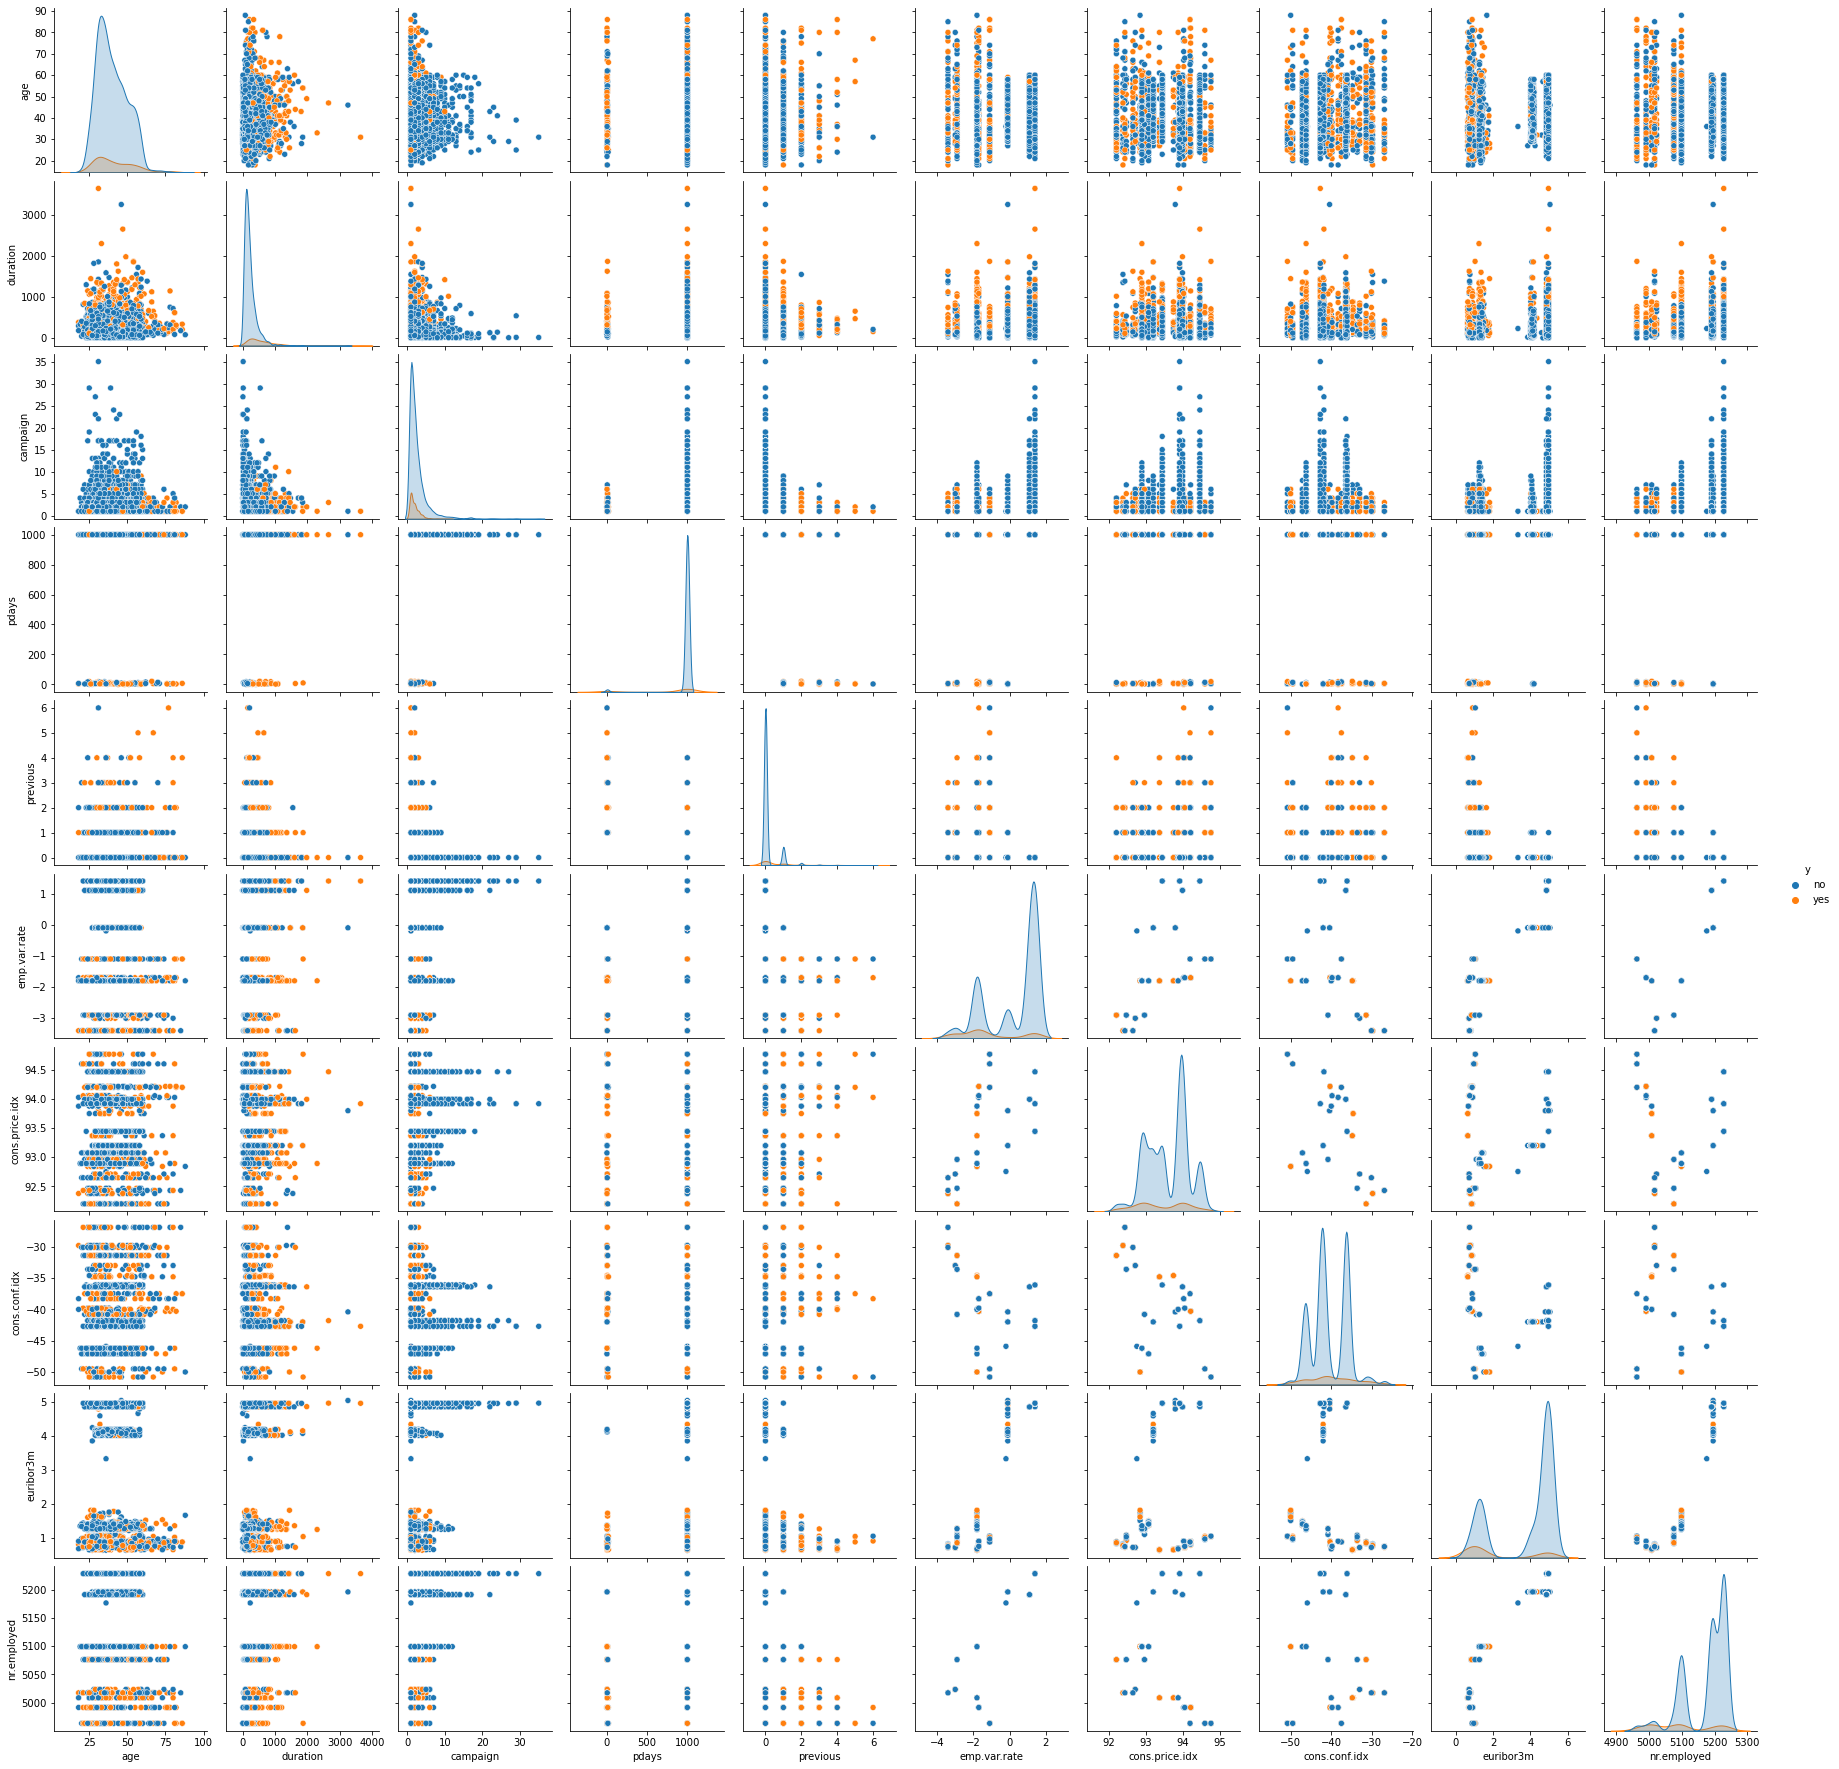

In [15]:
sns.pairplot(bankadd, hue='y')

In [16]:
bankadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
bankadd.describe()

age     duration     campaign        pdays     previous  \
count  4119.000000  4119.000000  4119.000000  4119.000000  4119.000000   
mean     40.113620   256.788055     2.537266   960.422190     0.190337   
std      10.313362   254.703736     2.568159   191.922786     0.541788   
min      18.000000     0.000000     1.000000     0.000000     0.000000   
25%      32.000000   103.000000     1.000000   999.000000     0.000000   
50%      38.000000   181.000000     2.000000   999.000000     0.000000   
75%      47.000000   317.000000     3.000000   999.000000     0.000000   
max      88.000000  3643.000000    35.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   4119.000000     4119.000000    4119.000000  4119.000000  4119.000000  
mean       0.084972       93.579704     -40.499102     3.621356  5166.481695  
std        1.563114        0.579349       4.594578     1.733591    73.667904  
min       -3.400000       92.201000     -50.800000     0.635000  4963.600000  
25%       -1.800000       93.075000     -42.700000     1.334000  5099.100000  
50%        1.100000       93.749000     -41.800000     4.857000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.961000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

In [18]:
bankadd.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

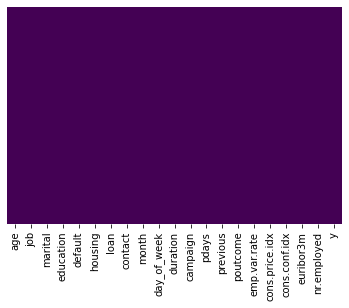

In [19]:
sns.heatmap(bankadd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Bank Full Dataframe

In [20]:
bankfull

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

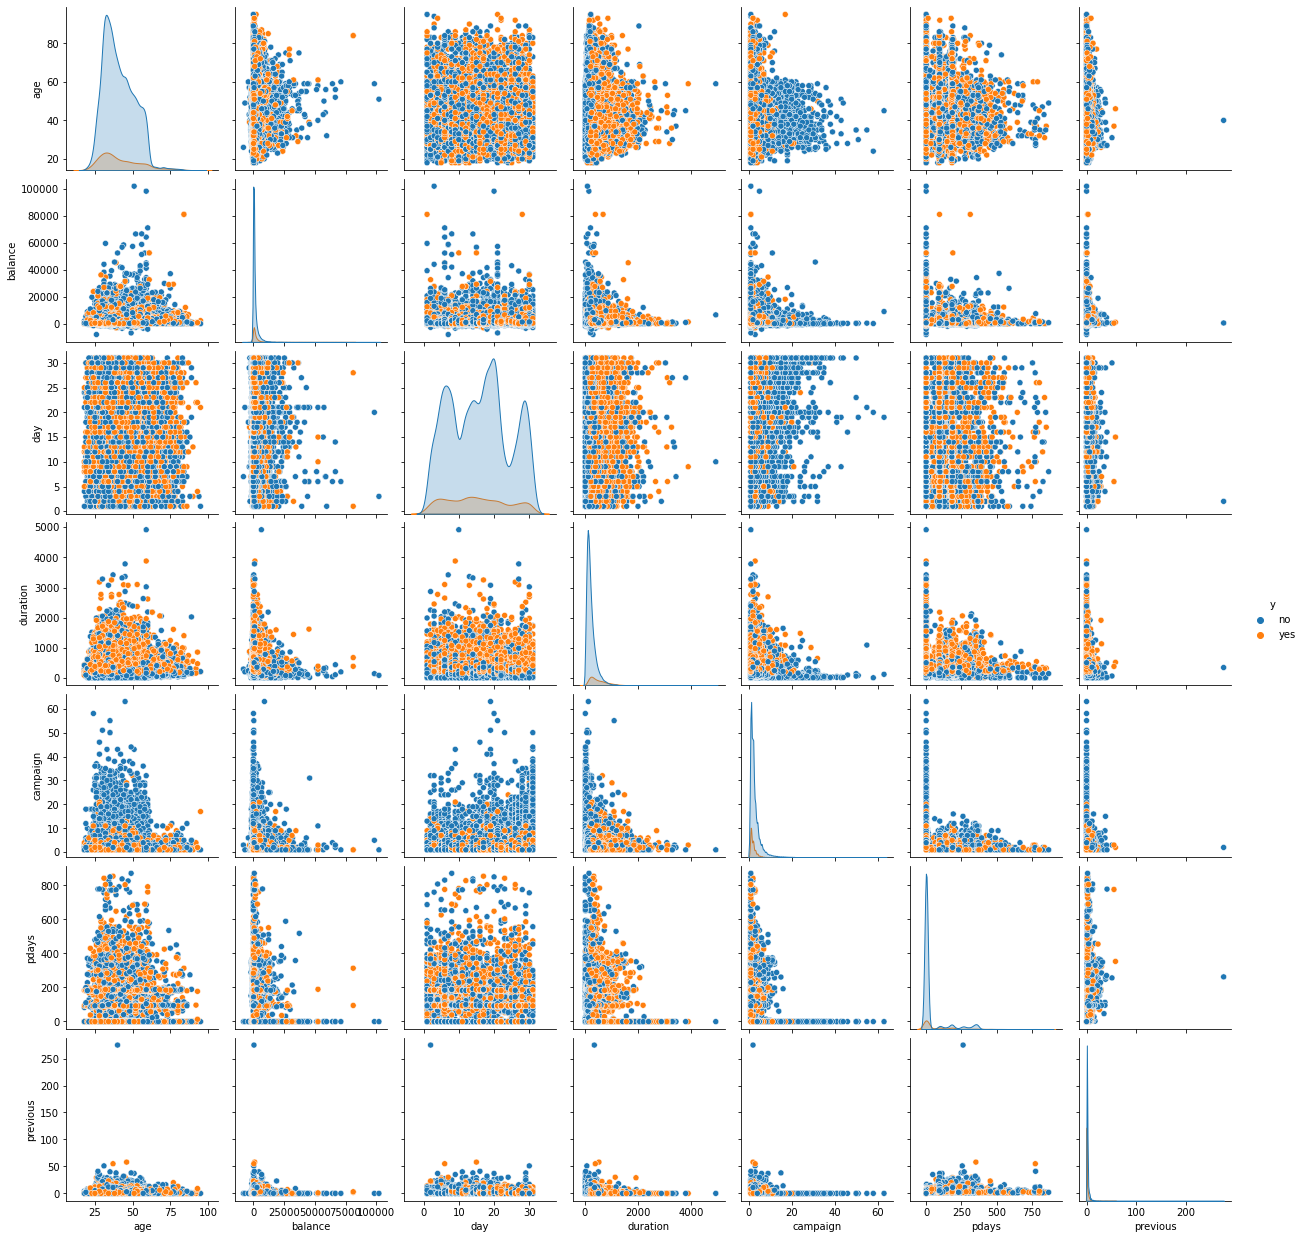

In [21]:
sns.pairplot(bankfull, hue='y')

In [22]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
bankfull.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [24]:
bankfull.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

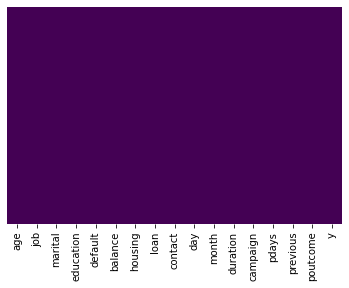

In [25]:
sns.heatmap(bankfull.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Bank Dataframe

In [26]:
bank

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

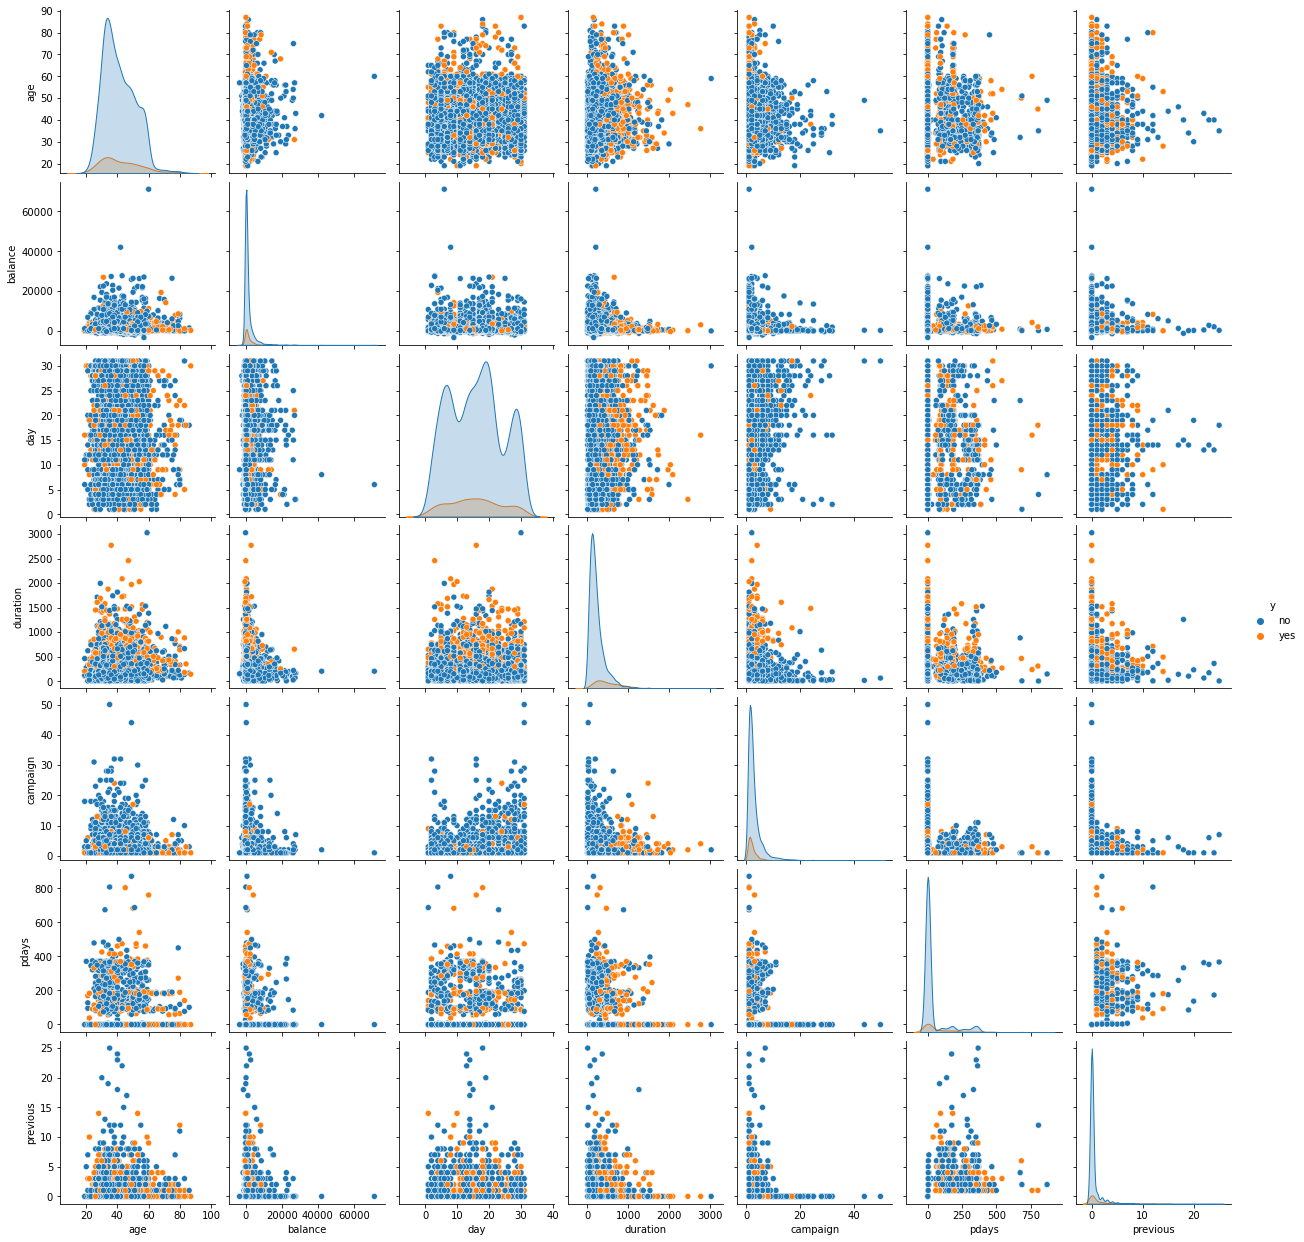

In [27]:
sns.pairplot(bank, hue='y')

In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [29]:
bank.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [30]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

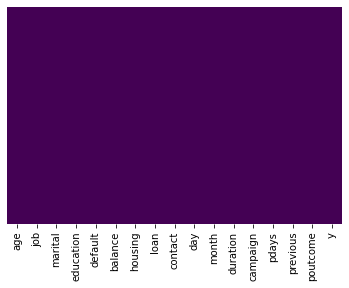

In [31]:
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the purposes of this project, we will use the Bank Additional Full dataset, as it is the most complete dataset when it comes to the number of inputs and large sample size.

# Exploratory Data Analysis

In [41]:
bankaddfull.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Yes or No? 

<AxesSubplot:xlabel='y', ylabel='count'>

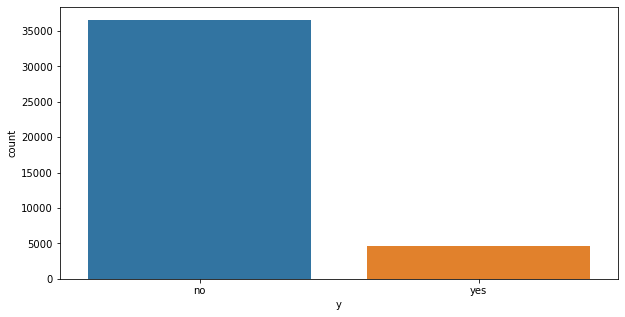

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data=bankaddfull, x='y')

In [11]:
yespercent= (len(yesaddfull['y'])/len(bankaddfull['y']))*100
yespercent

NameError: name 'yesaddfull' is not defined

A large proportion of the data is "no". Only 11.3% of the data  (3 SF.) is yes.

## Age 

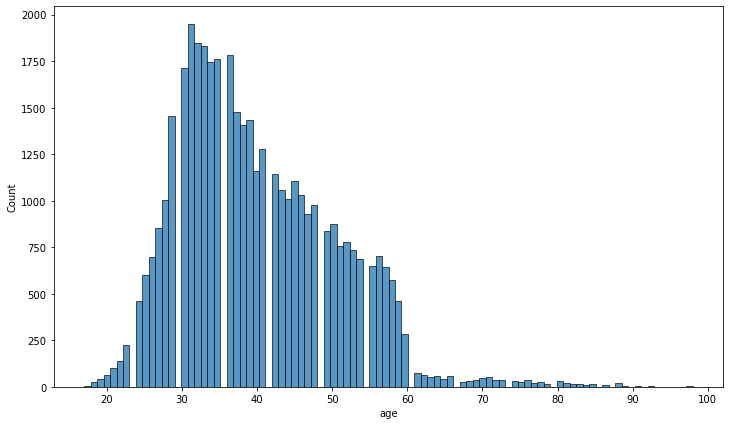

In [65]:
plt.figure(figsize=(12,7))
totalagecount=sns.histplot(data=bankaddfull, x='age')

In [80]:
yesagecount=yesaddfull['age'].value_counts()
yesagecount

31    220
33    210
30    202
29    186
32    184
     ... 
84      3
89      2
98      2
17      2
87      1
Name: age, Length: 75, dtype: int64

In [168]:
totalagecount=bankaddfull['age'].value_counts()
type(totalagecount)

pandas.core.series.Series

In [169]:
yesagepercent= (yesagecount/totalagecount)*100
type(yesagepercent)

pandas.core.series.Series

In [128]:
yesagepercent.values

array([ 40.        ,  42.85714286,  47.61904762,  35.38461538,
        28.43137255,  26.27737226,  21.23893805,  18.57451404,
        15.55183946,  17.47851003,  13.3960047 ,  15.08491508,
        12.80110117,  11.78529755,  11.29943503,   9.96749729,
        11.45662848,  10.54441261,   9.4940307 ,   8.65168539,
         9.28813559,  10.16346837,   7.96089385,   7.23514212,
         8.84194053,   7.96847636,   8.34123223,   7.61622156,
         8.34088849,   7.66990291,   6.25      ,   9.90806946,
         6.55542312,   9.94285714,   9.54907162,  10.39794608,
         9.27694407,   9.35672515,   8.64197531,  11.36363636,
         9.59752322,  10.06944444,  14.90280778,  20.49469965,
        43.83561644,  40.32258065,  30.90909091,  47.36842105,
        52.27272727,  50.87719298,  42.30769231,  45.45454545,
        41.17647059,  40.42553191,  39.62264151,  38.23529412,
        38.23529412,  46.875     ,  45.83333333,  52.94117647,
        65.        ,  51.85185185,  50.        ,  58.06

In [177]:
yesagedf=pd.Series.to_frame(yesagepercent,name='percentage')
yesagedf=yesagedf.fillna(value=0)
yesagedf.keys()

Index(['percentage'], dtype='object')

In [153]:
yesagedf=pd.Series.to_frame(yesagepercent)
yesagedf=yesagedf.fillna(value=0)
yesagedf['age'].values

array([ 40.        ,  42.85714286,  47.61904762,  35.38461538,
        28.43137255,  26.27737226,  21.23893805,  18.57451404,
        15.55183946,  17.47851003,  13.3960047 ,  15.08491508,
        12.80110117,  11.78529755,  11.29943503,   9.96749729,
        11.45662848,  10.54441261,   9.4940307 ,   8.65168539,
         9.28813559,  10.16346837,   7.96089385,   7.23514212,
         8.84194053,   7.96847636,   8.34123223,   7.61622156,
         8.34088849,   7.66990291,   6.25      ,   9.90806946,
         6.55542312,   9.94285714,   9.54907162,  10.39794608,
         9.27694407,   9.35672515,   8.64197531,  11.36363636,
         9.59752322,  10.06944444,  14.90280778,  20.49469965,
        43.83561644,  40.32258065,  30.90909091,  47.36842105,
        52.27272727,  50.87719298,  42.30769231,  45.45454545,
        41.17647059,  40.42553191,  39.62264151,  38.23529412,
        38.23529412,  46.875     ,  45.83333333,  52.94117647,
        65.        ,  51.85185185,  50.        ,  58.06

In [162]:
# Initialization of dictionary
#dict = { 'Geeks': 10, 'for': 12, 'Geek': 31 }
 
# Converting into list of tuple
list = [(k, v) for k, v in yesagedf.items()]
 
# Printing list of tuple
print(list)
type(list)

[('age', 17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: age, Length: 78, dtype: float64)]


list

In [165]:
plt.figure=((12,7))
plt.bar(data=list,x='age', height='age')

TypeError: 'tuple' object is not callable

In [155]:
plt.figure=((12,7))
plt.bar(data=yesagedf, x=yesagedf['age'].keys(),height=yesagedf['age'].values)

TypeError: 'tuple' object is not callable

<AxesSubplot:xlabel='Count', ylabel='age'>

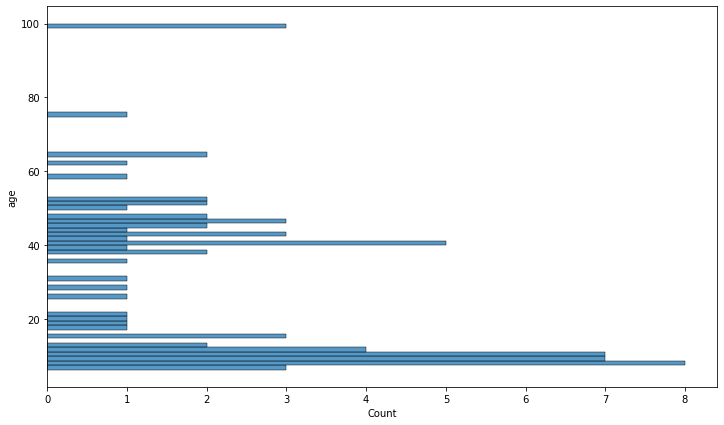

In [119]:
plt.figure(figsize=(12,7))
sns.histplot(data=bankfulladd['age'],y=(yesagecount/totalagecount)*100,bins=78)

<AxesSubplot:ylabel='Count'>

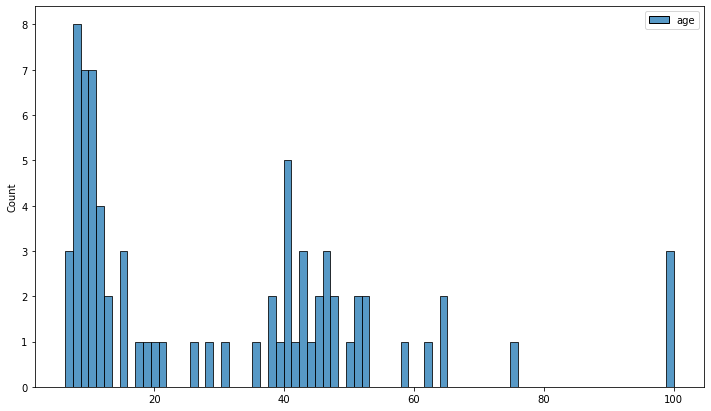

In [116]:
plt.figure(figsize=(12,7))
sns.histplot(data=yesagedf,bins=78)

<AxesSubplot:xlabel='age', ylabel='Count'>

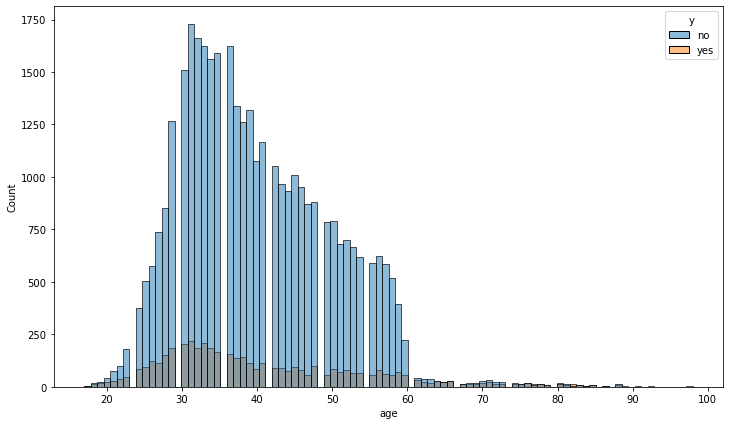

In [45]:
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull, x='age', hue='y')

<AxesSubplot:xlabel='y', ylabel='Count'>

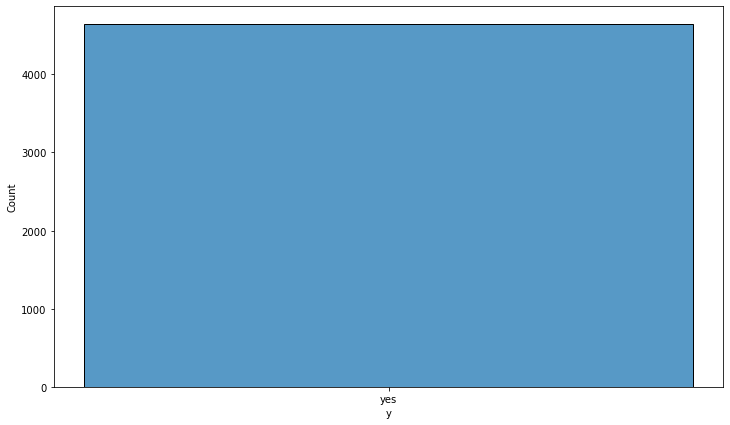

In [76]:
plt.figure(figsize=(12,7))
sns.histplot(data=yesaddfull, x='y')

In [68]:
yescount/totalagecount

TypeError: unsupported operand type(s) for /: 'AxesSubplot' and 'AxesSubplot'

There is no significant difference when it comes to the age. Although it may seem like younger people (20-40) have higher amounts of positive responses, there are also a higher number of calls to that demographic.

<AxesSubplot:xlabel='job', ylabel='count'>

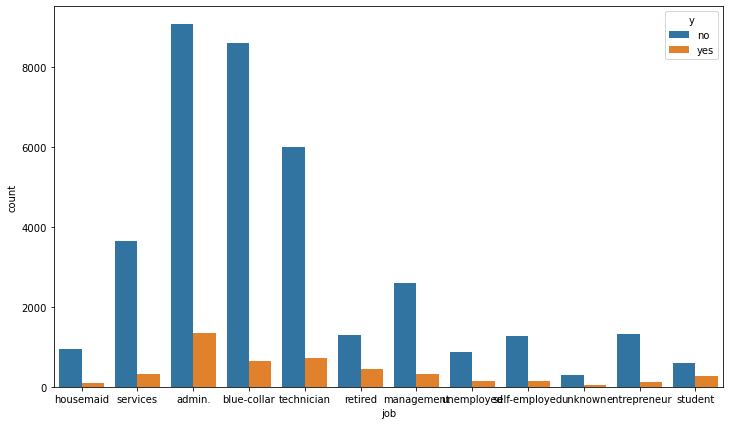

In [3]:
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='job', hue='y')